# Day 30: Introduction to Naive Bayes Classifier

The Naive Bayes Classifier stands as a cornerstone in the field of machine learning, offering a simplistic yet powerful approach to solving classification problems. By leveraging the principles of probability, this model aids in predicting the category of a given sample based on its attributes. Its name stems from the naïve assumption that all features are independent of each other, an assumption that simplifies calculations without significantly compromising performance in many cases. This lesson embarks on a journey to unravel the mechanics behind the Naive Bayes Classifier, including its theoretical foundations and practical applications, illustrating its significant role in the analytics and data science arena.

## Understanding Bayes' Theorem and Conditional Probability

Bayes' Theorem is a fundamental theorem in probability theory and statistics, offering a framework for understanding how the probability of a theory or hypothesis, A, changes in light of new evidence, B. The theorem is mathematically expressed as:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

- $P(A|B)$ is the posterior probability: the probability of the hypothesis A after observing B.
- $P(B|A)$ is the likelihood: the probability of observing the evidence B given that hypothesis A is true.
- $P(A)$ is the prior probability: the initial probability of the hypothesis A before observing B.
- $P(B)$ is the evidence: the probability of observing the evidence B under all possible hypotheses.

## Conditional Probability

Conditional probability represents the likelihood of an event or hypothesis occurring provided that another event has already occurred. In practice, this is important for calculating the likelihood $P(B|A)$ -- the probability of feature $B$ given class $A$. This step is crucial in implementing the Naive Bayes algorithm because it allows us to update our beliefs about the probability of a hypothesis (such as a data point belonging to a certain class) based on the evidence present in the data.

The likelihood of an event given a condition can be defined mathematically as:

$$
P(B|A) = \frac{P(A \cap B)}{P(A)}
$$

In the context of Naive Bayes:
- $P(B|A)$ is the probability of observing the features $B$ given that the class is $A$.
- $P(A \cap B)$ represents the joint probability of class $A$ occurring with feature $B$.
- $P(A)$ is the probability of class $A$ occurring.

One of the assumptions of Naive Bayes is that all features $B_i$ are conditionally independent given the class $A$. While in practice, this might not always be true, this simplification allows for the efficient computation of the posterior probability.


## Interpretation

This may seem intimidating at a glance, but most of these probabilities are available from a dataset through simple division. Our prior probabilities are just the count of data points with a certain trait divided by the total number of datapoints. For example:

### Cat Size vs Color

|          |large|medium|smol|  |  Totals |
|----------|:-:|:-:|:-:|---|:-:|
|**orange**| 2 | 5 | 4 |   |11|
|**black** | 3 | 6 | 6 |   |15|
|**tabby** | 4 | 7 | 1 |   |12|
|          |   |   |   |   |  |
|**Totals**| 9 | 18| 11|   |38|

Total cats: $ 2 + 3 + 4 + 5 + 6 + 7 + 4 + 6 +1 = 38 $.

Total **orange** cats: $ 2 + 5 + 4 = 11 $. $ P(orange) = 11 / 38 = 0.289 $.

Total **large** cats: $2 + 3 + 4 = 9 $. $ P(large) = 9 / 38 = 0.237 $.

What are the odds of a cat being large **given that** it's an orange cat? Now the entire population is no longer all 38 cats, but only the 11 orange cats. $P(large|orange) = 2 / 11 = 0.181$.

The additional information that the cat is orange allows us to use a more specific probability than the odds derived from the entire dataset. This is conditional probability at work: Our data table provides that $orange \cap large = 2$.

Bayes' Theorem is derived from conditional probability. we can use Bayes' to calculate the inverse likelihood:

$$ P(orange|large) = \frac{P(large|orange) \cdot P(orange)}{P(large)} = \frac{0.181 \cdot 0.289}{0.237} = 0.221 $$

*Does that check out?* Just using conditional probability, we can determine that $P(orange|large) = 2 / 9 = 0.222 $. That's what I get for working with only three decimal places.

*Why use Bayes', then?* We can calculate $P(size|color)$ and $P(color|size)$ for all the labels in this dataset from the table. We still need some likelihood ($P(large|orange)$) to use Bayes', but it's helpful in the situation of updating a hypothesis based on a new given: having learned that a cat is large, we can adjust the probabilities of each color.

## Applications and Examples
1. **Spam Filtering**: One of the classic applications of the Naive Bayes Classifier is in distinguishing spam emails from legitimate ones. By analyzing the frequency and combinations of words in an email, the classifier assigns probabilities to the email being spam or not, effectively filtering out unwanted messages.
   
2. **Sentiment Analysis**: Businesses utilize the Naive Bayes Classifier to gauge public sentiment from social media posts, reviews, and comments. This insight helps in understanding consumers' perceptions of products or services, guiding strategic decisions.
   
3. **Medical Diagnosis**: In healthcare, the Naive Bayes Classifier assists in diagnosing diseases by correlating symptoms with illnesses. By calculating the probabilities of various diseases given a set of symptoms, it supports medical professionals in making informed decisions.

This lesson will guide you through the foundational theory of conditional probability and Bayes' theorem, the mechanics of computing conditional likelihoods, and the practical steps to construct a Naive Bayes network using the pomegranate library. Through a blend of theoretical insights and hands-on exercises, we aim to foster a deep understanding of the Naive Bayes Classifier and its capabilities in solving classification challenges.




## Develop An Intuition For Conditional Probability

Let's plot a mosaic chart, which uses proportional area to show the counts of events occurring together. The variables for this example will be "Playing Outside" (Yes or No), and "Weather" (Sunny, Cloudy, or Rainy).

Our dataset will cover 110 days: 40 sunny days, 30 rainy days, and 40 cloudy days. 55 of the days were "play" days, and 55 of the days were "no play" days. So without considering the weather, we have a 50% chance of playing outside. In other words, $P(play) = 50\%$.

But the variables are definitely connected, so if we know the weather we can give more specific odds on the chance of being able to play outside. We can calculate $P(play|sunny)$, $P(play|cloudy)$ and $P(play|rainy)$ by filtering and counting our data. We can visualize all these chances by plotting a mosaic that shows squares for all these different combinations.


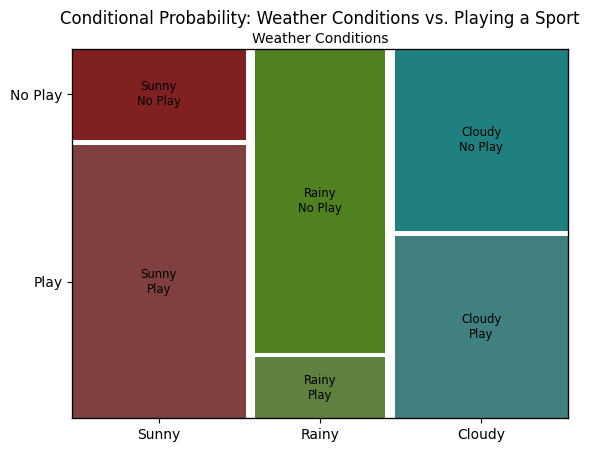

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Sample data: Weather Conditions vs. Playing a Sport
# This simulates a situation where the probability of playing a sport may depend on the weather condition.
data = {
    ('Sunny', 'Play'): 30,
    ('Sunny', 'No Play'): 10,
    ('Rainy', 'Play'): 5,
    ('Rainy', 'No Play'): 25,
    ('Cloudy', 'Play'): 20,
    ('Cloudy', 'No Play'): 20,
}

# Visualization
mosaic(data, gap=0.02, title='Conditional Probability: Weather Conditions vs. Playing a Sport')
plt.ylabel('Playing a Sport')
plt.xlabel('Weather Conditions')
plt.show()

# Interpretation
# The mosaic plot visually represents the conditional relationships between the weather conditions and the decision to play a sport.
# The width of each block corresponds to the proportion of days with that particular weather condition,
# while the height of each section within the block represents the conditional probability of deciding to play or not play the sport, given the weather condition.
# For example, it's visually apparent that people are more likely to play on sunny days compared to rainy days.



# On Synthetic Data

Rather than provide a dataset, this next block of code will create a dataset based on certain parameters. This is very cool, because it allows us to imagine a population with specific parameters, sample it however we like, then run tests on the sampled data to try and recreate the parameters we created it with. 

* Unlike real data, we're able to objectively know the trends in the population, rather than simply measuring a model's performance.
* Synthetic data can be generated to mimic real-world data without containing any actual sensitive or personal information, making it invaluable for data sharing and public demonstrations.
* It "compresses" well: the next paragraph of code can be used to produce millions of rows of data.

When using synthetic data, try to think adversarially, too: what trends could you synthesize that would be difficult to analyze, or cause ambiguous results? Should every class label appear equally frequently in your samples? Never forget that **synthetic data is not real data**: Designing synthetic datasets that can challenge and reveal weaknesses in your models is a sophisticated task. It requires a deep understanding of both the domain and the potential pitfalls of data modeling, such as overfitting or underfitting to particular trends.

* A model performing well against synthetic data does not mean that model can be inherently trusted when applied to real data.
* The trends you put into your data and the way you sample it can strongly bias the results that come out of it.

With that out of the way, here is some data generated for today's exercise, on the health impacts of smoking. **The data generated has no real-world basis**, if it demonstrates anything at all, it's the author's biases on the topic of cigarettes. Obviously, I advise you to not smoke cigarettes, but don't use this completely confabulated dataset as your justification for that.

In [1]:
# Synthetic data generation
import pandas as pd
import random

def random_row(chances_dict):
    """
    Generates a random row based on the provided chances for each tuple of smoker status and disease.
    Parameters:
        chances_dict (dict): A dictionary with keys as tuples of (smoker status, disease) and values as the chance of each.
    Returns:
        dict: A dictionary representing a single row with 'smoker' and 'disease' keys.
    """
    # Normalize the chances to ensure they sum to 1
    total_chance = sum(chances_dict.values())
    normalized_chances = {key: value / total_chance for key, value in chances_dict.items()}
    
    # Choose a random tuple based on the chances
    chosen_tuple = random.choices(list(normalized_chances.keys()), weights=normalized_chances.values(), k=1)[0]
    
    # Return the chosen tuple as a dictionary
    return {'smoker': chosen_tuple[0], 'disease': chosen_tuple[1]}

def create_smoker_csv(num_rows):
    """
    Creates a CSV file with data generated from random_row function.
    
    Parameters:
        num_rows (int): Number of rows to generate.
    """
    # Define the chances dictionary for generating rows
    chances_dict = {
        ("never smoked", "healthy"): 0.35,
        ("never smoked", "bronchitis"): 0.05,
        ("never smoked", "cancer"): 0.02,
        ("never smoked", "both"): 0.01,
        ("quit smoking", "healthy"): 0.25,
        ("quit smoking", "bronchitis"): 0.1,
        ("quit smoking", "cancer"): 0.05,
        ("quit smoking", "both"): 0.02,
        ("current smoker", "healthy"): 0.1,
        ("current smoker", "bronchitis"): 0.07,
        ("current smoker", "cancer"): 0.02,
        ("current smoker", "both"): 0.01
    }
    
    # Generate data
    data = [random_row(chances_dict) for _ in range(num_rows)]
    
    # Convert to DataFrame and write to CSV
    df = pd.DataFrame(data)
    df.to_csv('health_dataset.csv', index=False)

# Example usage to create a CSV file with 1000 rows
create_smoker_csv(1000)

# Constructing a Naive Bayes Classifier with pomegranate

After delving into the theory behind the Naive Bayes Classifier and exploring its diversified applications, it's time to translate this theoretical knowledge into practice. Leveraging the `pomegranate` library, this part of the lesson focuses on the technical steps necessary to construct, train, and employ a Naive Bayes classifier in addressing a real-world classification challenge. The `pomegranate` library has been chosen for its user-friendly interface and efficient computation capabilities which streamline the process of building probabilistic models.


## Exercise For The Reader

In this exercise, you are provided with a dataset named `health_dataset.csv`, which comprises patient records. Each record includes attributes such as `Age`, `Gender`, `BMI`, `Smoker`, and `Disease`. Your task is to apply the concepts of the Naive Bayes Classifier introduced in the lesson to this real-world dataset. The objective is to compute conditional probabilities, visualize relationships between variables, and ultimately, predict the likelihood of a patient having a certain disease based on their characteristics.

### Definition
Recall the core concept behind the Naive Bayes Classifier: it is based on Bayes' theorem, which relates the conditional probabilities of events. The theorem is mathematically represented as:

$$
P(Disease|Features) = \frac{P(Features|Disease) \cdot P(Disease)}{P(Features)}
$$

In this formula, $P(Disease|Features)$ is the posterior probability of having a disease given the patient features, $P(Features|Disease)$ is the likelihood of observing these features given the disease, $P(Disease)$ is the prior probability of the disease, and $P(Features)$ is the probability of the features.

### Task Workflow:

1. **Load the Dataset**: Begin by loading `health_dataset.csv` into a pandas DataFrame. This dataset serves as the foundation for your computations and analyses.

2. **Data Exploration**: Familiarize yourself with the dataset. Compute basic statistics, and explore the distribution of each feature and the target variable `Disease`. Understanding the structure and characteristics of your data is crucial.

3. **Conditional Probability Calculations**: Use the `bayes_given` function to filter the dataset based on certain conditions (e.g., `smoker = current smoker`). Compute conditional probabilities such as $P(Disease|Smoker)$ and $P(Disease|BMI>25)$. This step is key to understanding how individual features relate to the likelihood of the disease.

4. **Visualization**: Create mosaic plots to visually represent the relationships between features (e.g., `smoker`) and the target variable `Disease`. Visualizations help in intuitively grasping how various factors influence the probability of diseases.

5. **Interpretation**: Interpret the calculated probabilities and visualizations to draw conclusions about the relationship between patient features and the likelihood of having a disease. Consider how this exercise reflects the practical application of the Naive Bayes Classifier in identifying patterns and predicting outcomes based on probabilities.

Good luck!


              smoker  disease
count           1000     1000
unique             3        4
top     never smoked  healthy
freq             439      681
disease
healthy       681
bronchitis    211
cancer         74
both           34
Name: count, dtype: int64
Conditional probability (placeholder) for condition {'smoker': 'never smoked'}: 0.0


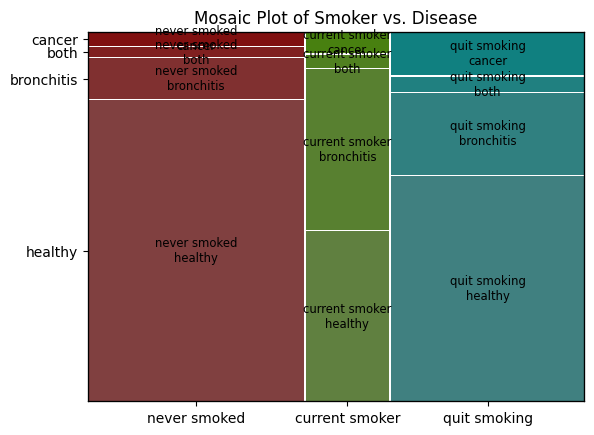

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Load the dataset
df = pd.read_csv('health_dataset.csv')

# Explore the dataset
# Print basic statistics
print(df.describe())
# Print the distribution of the target variable 'Disease'
print(df['disease'].value_counts())

# Data Filtering Function
def bayes_given(condition):
    """
    Filters the dataset based on a given condition and calculates probabilities relevant for Naive Bayes.
    
    Parameters:
        condition (dict): A dictionary where keys are column names and values are conditions on those columns.
    
    Returns:
        float: Conditional probabilities based on the filter applied.
    """
    # Apply filter based on condition
    # For example, condition could be {'Smoker': 'Yes'}
    filtered_df = df.copy()  # Start with a copy of the original DataFrame
    
    for column, value in condition.items():
        # Here, implement filtering based on condition, e.g.,
        # if column == 'Smoker' and value == 'Yes':
        filtered_df = filtered_df[filtered_df[column] == value]
    
    # Calculate and return conditional probability
    # Placeholder for conditional probability calculation
    # Example: prob_disease_given_condition = (number of diseased in filtered_df) / (total number in filtered_df)
    prob_disease_given_condition = 0.0  # Placeholder, replace with actual calculation
    
    return prob_disease_given_condition

# Example of how to use the bayes_given function
# This is just a template, you will need to fill in the actual logic
condition_example = {'smoker': 'never smoked'}
print(f"Conditional probability (placeholder) for condition {condition_example}:",
      bayes_given(condition_example))

# Visualization - Mosaic Plot (Placeholder)
# You should replace the zeros with the appropriate variables from your calculations
mosaic(df, ['smoker', 'disease'])
plt.title('Mosaic Plot of Smoker vs. Disease')
plt.show()

# Interpretation
# At this stage, you would interpret the results from your calculations and visualizations.
# For example, you could discuss how the conditional probabilities and mosaic plot reflect the likelihood of disease given certain conditions.



Good luck and happy analyzing!